# Sampling Distribution of a Statistic - Page 57


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

loans_income = pd.read_csv("loans_income.csv").squeeze('columns')
# Squeeze 1 dimensional axis objects into scalars



In [109]:
#loans_income.info()
print("shape:", loans_income.shape, "\n")
print(loans_income.head())

shape: (50000,) 

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64


In [75]:
# We format the data into a DataFrame:

sample_data = pd.DataFrame({
        'income': loans_income.sample(1000),
        'type': 'Data',
    })

In [111]:
# Showing the sample data, every time it's different subset
sample_data.head()

,income,type
46098,65000,Data
39927,40000,Data
40181,50000,Data
27346,53000,Data
31059,40000,Data
34838,45000,Data
2102,120000,Data
1575,91475,Data
12034,45000,Data
9016,165000,Data


In [127]:

sample_mean_05 = pd.DataFrame({
'income': [loans_income.sample(5).mean() for _ in range(1000)],
        'type': 'Mean of 5',
    })

sample_mean_05.head()


,income,type
0,58600.0,Mean of 5
1,59200.0,Mean of 5
2,100200.0,Mean of 5
3,89740.0,Mean of 5
4,96200.0,Mean of 5


In [129]:

sample_mean_20 = pd.DataFrame({
'income': [loans_income.sample(20).mean() for _ in range(1000)], 'type': 'Mean of 20',
    })

sample_mean_20.head()

,income,type
0,62894.00,Mean of 20
1,59442.00,Mean of 20
2,75748.20,Mean of 20
3,73261.50,Mean of 20
4,64946.65,Mean of 20


In [133]:
results

,income,type
46098,65000.00,Data
39927,40000.00,Data
40181,50000.00,Data
27346,53000.00,Data
31059,40000.00,Data
...,...,...
995,70464.95,Mean of 20
996,76230.00,Mean of 20
997,62859.00,Mean of 20
998,61829.80,Mean of 20


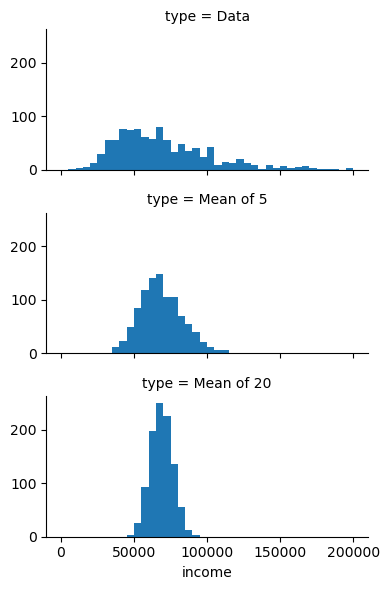

In [153]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

# FacetGrid = Multi-plot grid for plotting conditional relationships.

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)

# col= Variables that define subsets of the data, which will be drawn on separate facets in the grid
# col_wrap = “Wrap” the column variable at this width, so that the column facets span multiple rows. = 1 graph per row
# height = Height (in inches) of each facet
# aspect = Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

g.map(plt.hist, 'income', range=[0, 200000], bins=40)


                                         


# map(hist)
The map() function is used to apply a given function ("hist" in this case) to every item of an iterable, 
such as a list or tuple, and returns a map object (which is an iterator). 

It takes as arguments:

- The function to apply (plt.hist).
- Column names or data variables to be passed to the function ('income' here).

For each unique value of the type column, Seaborn creates a subset of the data and applies the function to plot a histogram of the income column.

Additional arguments to plt.hist:

    range=[0, 200000]: Specifies the range of the histogram.
    bins=40: Specifies the number of bins for the histogram.


## Summary

The map function iterates over each facet (subplot) created by the FacetGrid and applies the specified function (plt.hist) to the corresponding subset of the data. Each subplot visualizes the distribution of income for one unique value of type.

In [156]:

g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

## col_name

The line g.set_titles('{col_name}') in this context is used to customize the titles of the subplots (facets) in the FacetGrid.
g.set_titles:

This method controls how the titles of the subplots are displayed in a FacetGrid.

The argument '{col_name}' specifies the template for the titles.

{col_name}:

This is a placeholder for the column name that is used to create the facets (in this case, the type column from results).
For each subplot, {col_name} is replaced by the unique value of the type column that corresponds to that facet.
